# 从零开始实现 线性回归

In [3]:
%matplotlib inline
import random
import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from d2l import torch as d2l

print("Hello world!")

Hello world!


features tensor([1.5638, 0.3336])
labels tensor([6.1806])


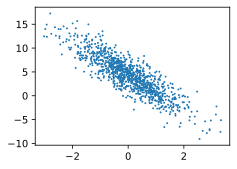

In [4]:
def synthetic_data(w, b, num_examples): #@save
    """⽣成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print("features", features[0])

print("labels", labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [5]:
# read data set
def data_iter(bath_size,features,labels):
    num_examples = len(features)
    index = list(range(num_examples))
    random.shuffle(index)
    for i in range (0,num_examples,bath_size):
        bath_index = torch.tensor(index[i:min(i+bath_size,num_examples)])
        yield features[bath_index],labels[bath_index]

bath_size = 10
for X,y in data_iter(bath_size,features,labels):
    print(X,'\n',y)
    print("--------------------------------")
    break

tensor([[ 0.0359,  0.6439],
        [ 0.2736,  0.1527],
        [-2.5988,  1.4034],
        [-3.2102,  0.2026],
        [-0.6976, -1.8163],
        [ 1.9872,  0.9696],
        [ 0.5859,  0.5790],
        [ 0.0165, -0.6252],
        [ 0.6102, -2.0729],
        [ 0.9995, -0.1062]]) 
 tensor([[ 2.0794],
        [ 4.2202],
        [-5.7616],
        [-2.9144],
        [ 8.9892],
        [ 4.8545],
        [ 3.4034],
        [ 6.3746],
        [12.4565],
        [ 6.5601]])
--------------------------------


### 训练初始化 
模型：Liner
Loss：均方损失
优化算法：小批量随机梯度优化 sgd

In [6]:
# Inital
#正态分布随机初始化权重w，偏置b初始化为零
w = torch.normal(0,0.01,size=(2,1),requires_grad = True)
b = torch.zeros(1,requires_grad=True)

#定义线性模型 Model ：Liner
def linreg (X,w,b):
    return torch.matmul(X,w) + b

#定义损失函数 Loss ： 均方损失
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# 优化算法 小批量梯度下降更新
def sgd(params,lr,bath_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / bath_size
            param.grad.zero_()
            



In [13]:
# train the model

#超参数 模型 Loss 确定
lr = 0.03
num_epochs = 10
net = linreg
loss  = squared_loss

In [15]:
for epoch in  range(num_epochs):
    for X,y in data_iter(bath_size,features,labels):
        l = loss(net(X,w,b),y) # loss of the bath
        l.sum().backward()
        sgd([w,b],lr,bath_size)

    with torch.no_grad():
        train_1 = loss(net(features,w,b),labels)
        print(f"epoch{epoch + 1},loss {float(train_1.mean())}")

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch1,loss 4.795531276613474e-05
epoch2,loss 4.8100948333740234e-05
epoch3,loss 4.803001138498075e-05
epoch4,loss 4.804923082701862e-05
epoch5,loss 4.8114245146280155e-05
epoch6,loss 4.8140063881874084e-05
epoch7,loss 4.814690328203142e-05
epoch8,loss 4.805044227396138e-05
epoch9,loss 4.7991670726332814e-05
epoch10,loss 4.7896024625515565e-05
w的估计误差: tensor([-0.0004,  0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([2.5749e-05], grad_fn=<RsubBackward1>)
